<div style="background-color: #FFFFFF; padding: 40px; border: 1px solid #D3D3D3;">

<b><p style="font-family: 'Times New Roman', serif; text-align: center; margin-bottom: 0x;">Fake Jobs Classification</p></b>
<p style="font-family: 'Times New Roman', serif; text-align: center; margin-bottom: 10px;">Logan M. Reynolds</p>
<p style="font-family: 'Times New Roman', serif; text-align: center; margin-bottom: 10px;">Department of Account, Finance, Info Systems at Ferris State University</p>
<p style="font-family: 'Times New Roman', serif; text-align: center; margin-bottom: 10px;">ARTI 330: Natural Language Processing</</p>
<p style="font-family: 'Times New Roman', serif; text-align: center; margin-bottom: 10px;">Professor Greg Gogolin</p>
<p style="font-family: 'Times New Roman', serif; text-align: center; font-size: 14px;">A Jupyter Notebook</p>
</div>

# Attempt 2 Prelude 

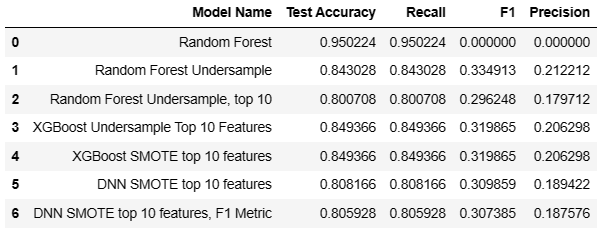
*Table from Attempt 1*

### Conclusion from Attempt 1

The first model (Random Forest) had an F1 score of 0. This is because the precision was 0. The model never accurately classified a fake job posting. The next model was under sampled. This improved the F1 score a great deal. Since the feature selection from the first model indicated that not all features had a real impact (over 40 features) it was decided to keep only 10 and see if improvements would happen.

Low and behold, metrics fell. Opting for a new algorithm but still in the realm of decision trees, the XGBoost algorithm is known to win contestants money in machine learning competitions. So the model was set up and ran both with an under sample and the SMOTE technique in attempts to balance the extreme class imbalance. For some reason the metrics were the same for both models. The F1 scores were not better than the under sampled random forest (model 2). 

Out of curiosity, two Deep Neural Networks (DNN) were run. There was not too much research into the inner workings of these models, so the results were not surprising. The only difference between the two is the metric change from accuracy to the user defined F1. Looking at the table the user defined F1 metric improved the F1 by only a hair. 

Overall, all the models were all garbage. From here, going in depth with the hyperparameter tunning for the Random Forest Model(s), and or XGBoost Model(s) is probably the best move as the DNN models were “black box code.” 

__To note:__ after reading the discussion on Kaggle for the dataset, some recommended balancing the dataset prior to the train test split. I was under the impression that this was an illegal tactic, but it wouldn’t hurt trying seeing that the scores are all bad. 

___

<center>
    <h1>Fake Jobs Classification</h1>
</center>

## Goal 

The goal of this notebook is to build machine learning model(s) to correctly classify if a Job Posting is not fradulant (0) or fradulant (1).

### Data Dictionary 

___

* __job_id:__ Unique Job ID

* __title:__ The title of the job ad entry.

* __location:__ Geographical location of the job ad 

* __department__: Corporate department (e.g. sales).

* __salary_range__: Indicative salary range (e.g. 50,000 USD - 60,000 USD)

* __company_profile__: A brief company description.

* __description__: The details description of the job ad.

* __requirements:__ Enlisted requirements for the job opening.

* __benefits:__ Enlisted offered benefits by the employer.

* __telecommuting:__ True for telecommuting positions.

* __has_company_logo:__ True if company logo is present.

* __has_questions:__ True if screening questions are present.

* __employment_type:__ Full-type, Part-time, Contract, etc.

* __required_experience:__ Executive, Entry level, Intern, etc.

* __required_education:__ Doctorate, Master’s Degree, Bachelor, etc.

* __industry:__ Automotive, IT, Health care, Real estate, etc.

* __function:__ Consulting, Engineering, Research, Sales etc.

* __fraudulent:__ target - Classification attribute.

___

#### [Source]
__Author__  [Shivam Bansal](https://www.kaggle.com/shivamb)

__Link__    [Data Set on Kaggle](https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction/data)

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline


data_path: str = "fake_job_postings.csv"
    
df = pd.read_csv(data_path)

### Num_Missing Feature
* From the first attempt, relized that many fraudulent cases have missing values. Since there is plan to use feature selection, no harm in adding.

In [2]:
df['num_missing'] = df.isna().sum(axis=1)

## Data Overview
For a full data overview, see attempt 1.

In [3]:
# dropping columns with many missing values
df.drop(["job_id", "salary_range", "department", "title"], axis=1, inplace=True)

The feature "job_id" was a unique identification feature. The others, "salary_range," and "department" had too many missing values. The column, "title" has many unique values. These decisions stemmed from the first attempt.

In [4]:
# converting columns to type string
df = df.convert_dtypes(str)

In [5]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()
    

def show_wordcloud(df, column_name):
    """ Tokenized text feature to wordcloud. """

    # Join the tokenized words into a single string
    text = " ".join(df[column_name].explode().astype(str))

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


## Outliers

In [6]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)

Index(['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent',
       'num_missing'],
      dtype='object')


All the numeric columns are binary except num_missing. This feature has outliers but they will not be capped. 

## EDA

#### Numeric

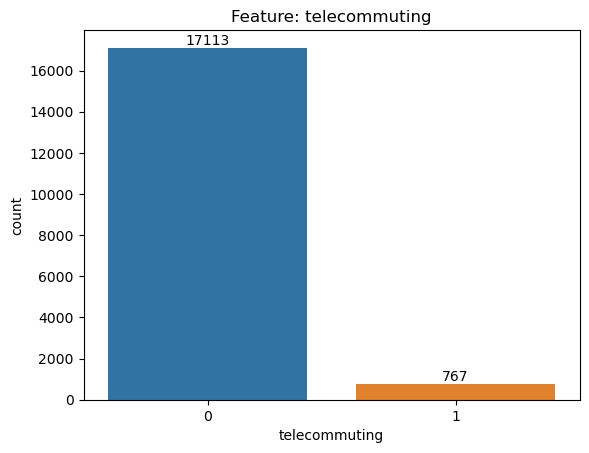

````````````````````````````````````````````````````````````````````````````````````````````````````


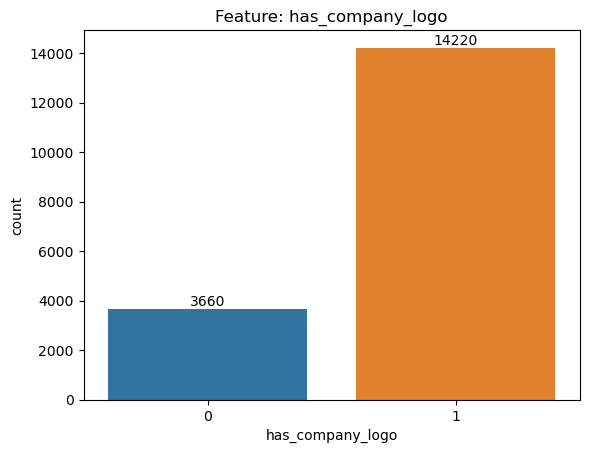

````````````````````````````````````````````````````````````````````````````````````````````````````


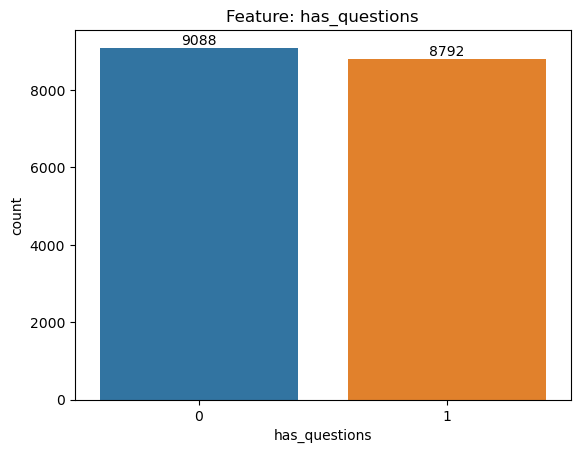

````````````````````````````````````````````````````````````````````````````````````````````````````


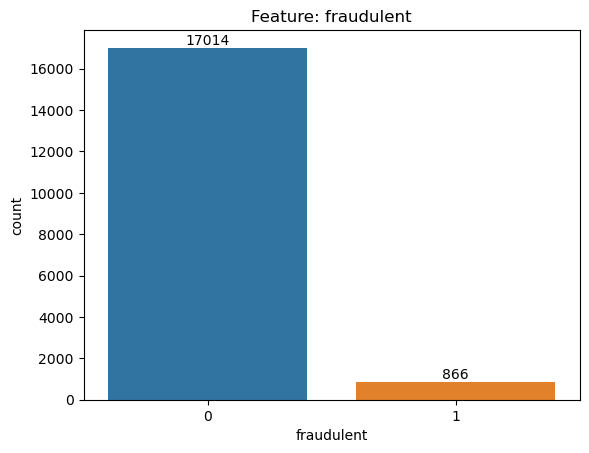

````````````````````````````````````````````````````````````````````````````````````````````````````


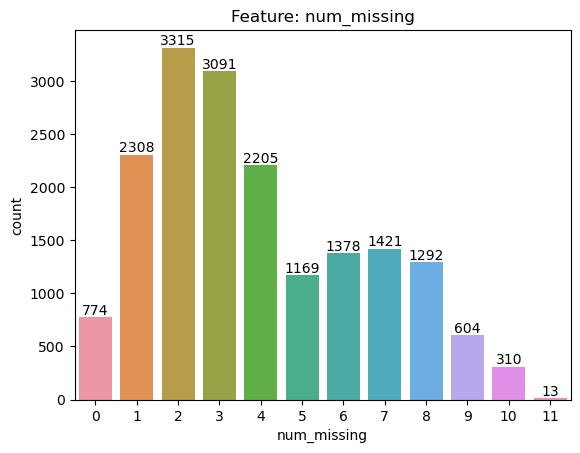

````````````````````````````````````````````````````````````````````````````````````````````````````


In [7]:
for col in numeric_cols:
    img = sns.countplot(df, x=col, dodge=True)
    img.bar_label(img.containers[0])
    plt.title(f"Feature: {col}")
    plt.show(img)
    print("`" * 100)

The data set is extremely unbalanced. The feature, "num_missing" states that most records have 1 or more missing feature. If the company has a logo or not will probably be a good indicator too. 

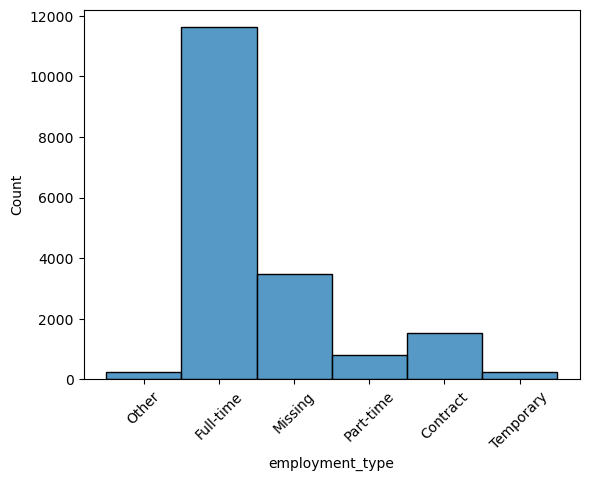

In [8]:
# Employment Type
sns.histplot(data=df, x=df['employment_type'].replace([None], "Missing"))
plt.xticks(rotation=45)
plt.show()

Most jobs in this dataset are full-time positions. It would make sense to throw the missing values into "other." 

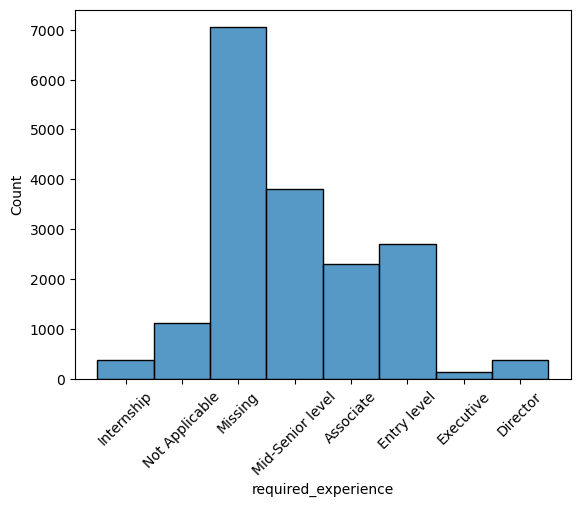

In [9]:
# required experience
sns.histplot(data=df, x=df['required_experience'].replace([None], "Missing"))
plt.xticks(rotation=45)
plt.show()

There is alot of job postings that are missing the required experience. Dropping this feature or throwing it into another category may be a waste. Perhaps missing required_experience is a good indicator if a job is real or fake.

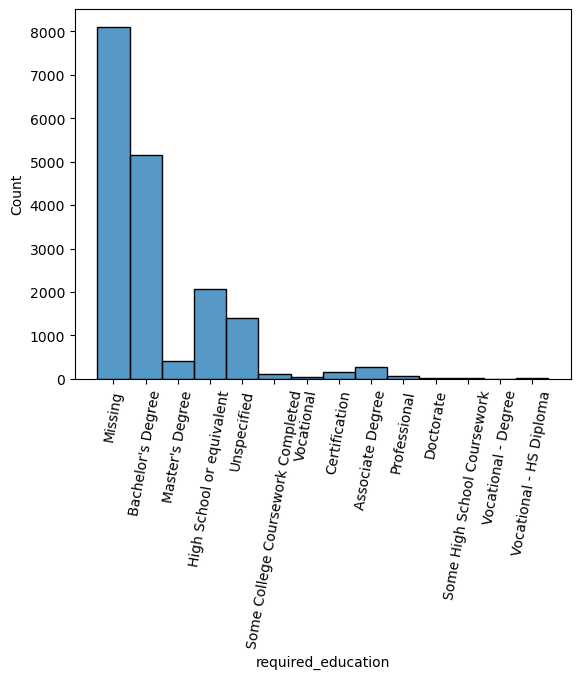

In [10]:
# required education
sns.histplot(data=df, x=df['required_education'].replace([None], "Missing"))
plt.xticks(rotation=80)
plt.show()

After highschool, the most common requirement that is listed is at least a Bachelor's Degreee. The missing values can be thrown into the unspecified category. 

> Note: The remaining features cannot be displayed until text prepocessing

#### Multivariate 

fraudulent                            0    1   All
required_education                                
All                                9360  415  9775
High School or equivalent          1910  170  2080
Bachelor's Degree                  5045  100  5145
Unspecified                        1336   61  1397
Master's Degree                     385   31   416
Some High School Coursework           7   20    27
Certification                       151   19   170
Associate Degree                    268    6   274
Professional                         70    4    74
Some College Coursework Completed    99    3   102
Doctorate                            25    1    26
Vocational                           49    0    49
Vocational - Degree                   6    0     6
Vocational - HS Diploma               9    0     9
------------------------------------------------------------------------------------------------------------------------


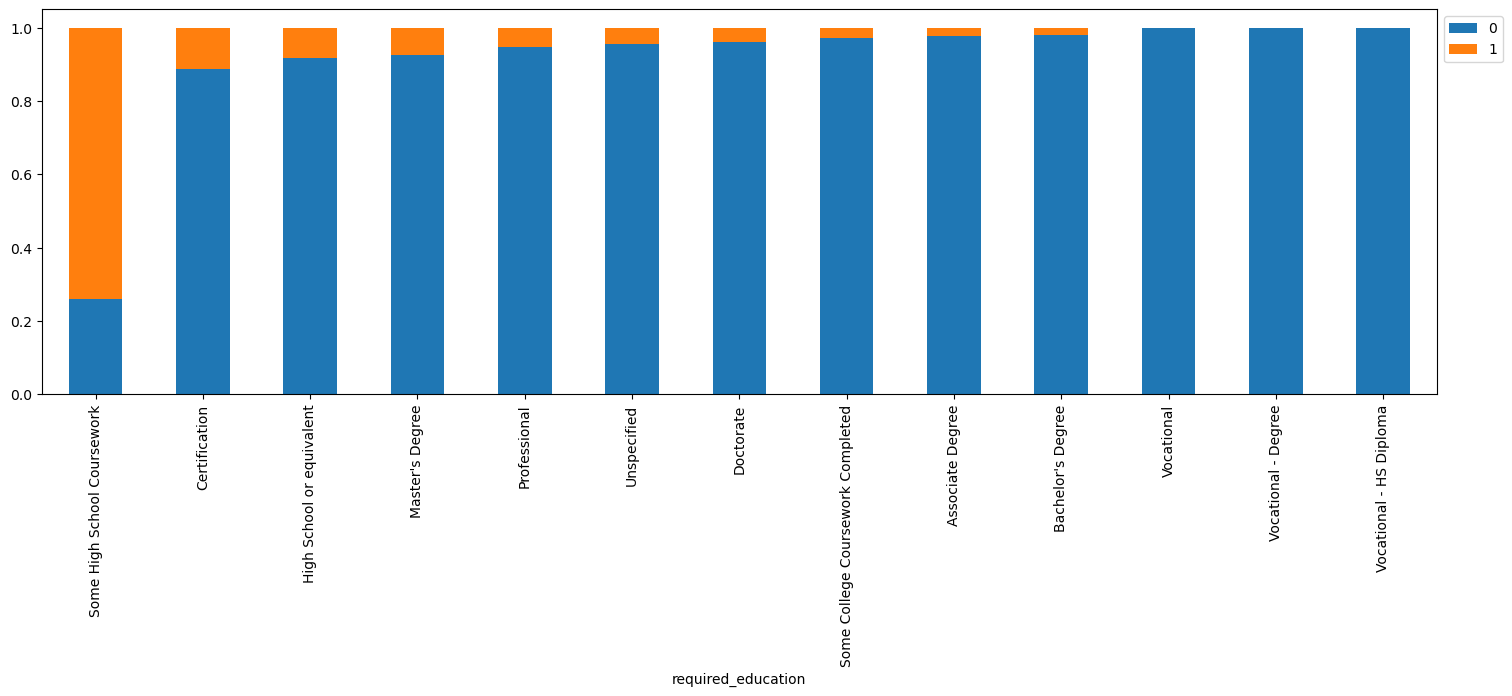

In [11]:
stacked_barplot(df, "required_education", "fraudulent")

Many of the fraudulent cases are targeted at a certain demographic. This comes from the fact that many fraudulent cases don't even require a highschool diploma.

fraudulent               0    1    All
required_experience                   
All                  10399  431  10830
Entry level           2518  179   2697
Mid-Senior level      3696  113   3809
Not Applicable        1056   60   1116
Associate             2255   42   2297
Director               372   17    389
Executive              131   10    141
Internship             371   10    381
------------------------------------------------------------------------------------------------------------------------


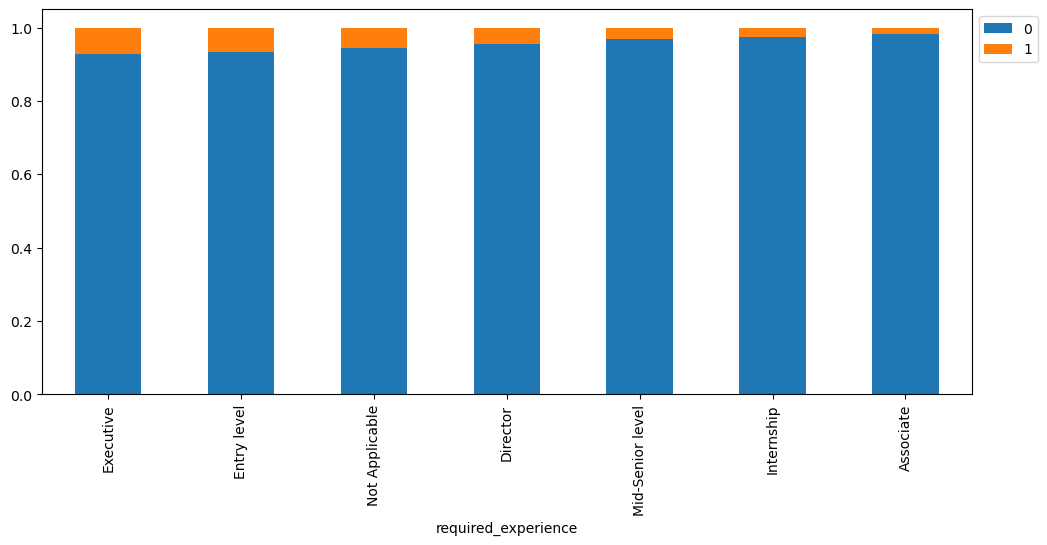

In [12]:
stacked_barplot(df, "required_experience", "fraudulent")

The required_experience feature will likley be a bad predictor. 

fraudulent                     0    1    All
industry                                    
All                        12386  591  12977
Oil & Energy                 178  109    287
Accounting                   102   57    159
Hospital & Health Care       446   51    497
Marketing and Advertising    783   45    828
...                          ...  ...    ...
Maritime                       3    0      3
Computer Games                86    0     86
Machinery                     11    0     11
Luxury Goods & Jewelry         4    0      4
Legal Services                97    0     97

[132 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


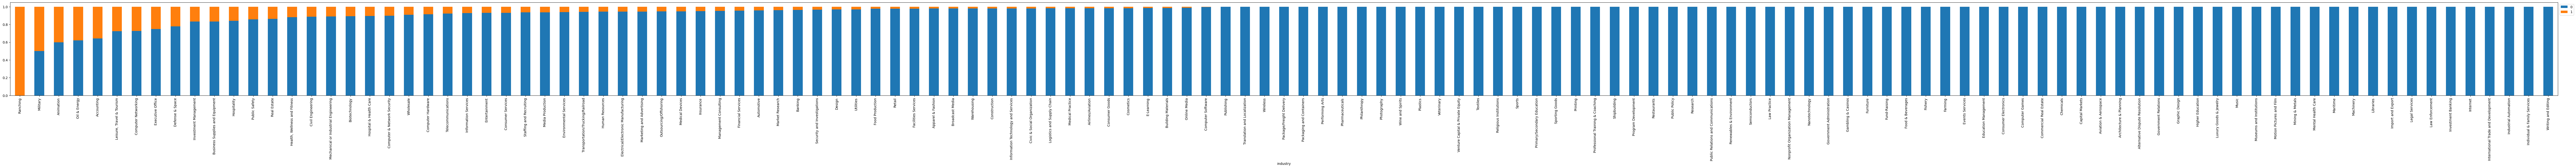

In [13]:
stacked_barplot(df, "industry", "fraudulent")

Not too much to speak on here. Category option that is all fraudulent only has one appearence in entire dataset (Ranching). 

fraudulent       0    1    All
num_missing                   
All          17014  866  17880
8             1162  130   1292
2             3203  112   3315
1             2209   99   2308
7             1323   98   1421
6             1294   84   1378
3             3014   77   3091
0              702   72    774
5             1104   65   1169
4             2148   57   2205
10             277   33    310
9              575   29    604
11               3   10     13
------------------------------------------------------------------------------------------------------------------------


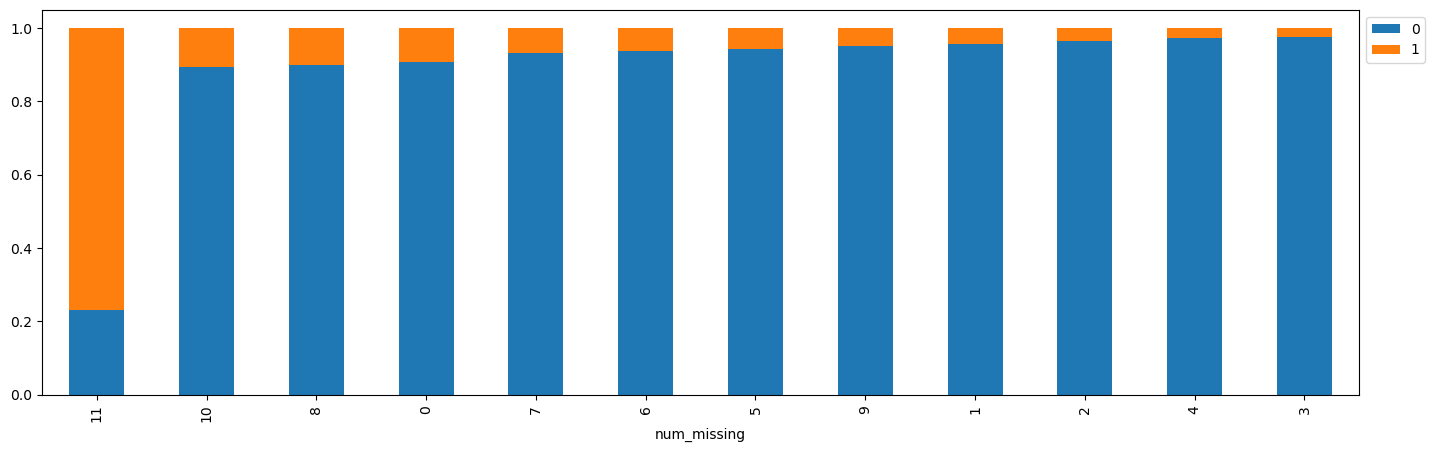

In [14]:
stacked_barplot(df, "num_missing", "fraudulent")

Perhaps this feature will be important in the model. Records with 11 missing features are more likley to be fraudulent than not.

#### Heatmap

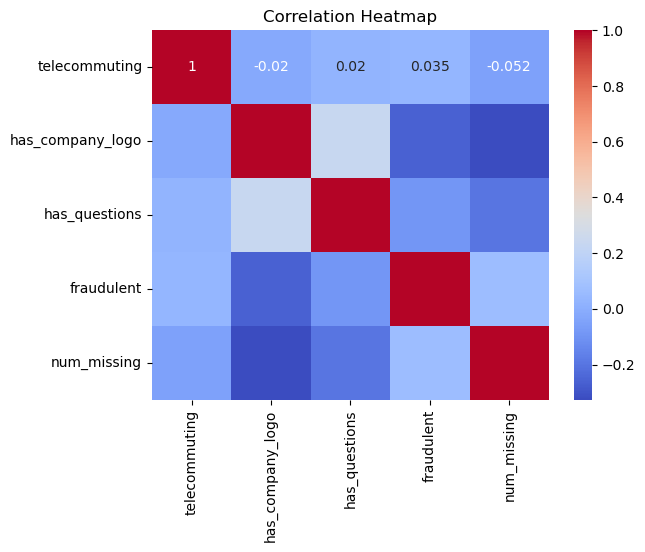

In [15]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Looking at the target variable "fraudulent," no numeric features have medium or strong positive or negative correlations. 

## Feature Engineering Reasoning

In [16]:
df["function"].value_counts()

function
Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Education                  325
Other                      325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Art/Creative               132
Writing/Editing            132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training                    38

This feature has many possibilities as to what a missing value could be. There is 6,193 missing values that could be placed into Other since it already exists but this would probably negativly affect the model(s) to come.

In [17]:
# records with no location and are fraudulent

len((df[(df["location"] == None) & (df["fraudulent"] == 1)]))

0

Since 300ish records have no location and they have the majority class, we will drop these records instead of imputing the data.

In [18]:
# missing values in text columns 

textColumns = ["company_profile", "description", "requirements", "benefits"]
df[textColumns].isnull().sum()

company_profile    3308
description           1
requirements       2696
benefits           7212
dtype: int64

## Feature Engineering

* Dropped "function"
* Generalized "location" to country only
* Dropped records with missing locations
* replaced missing values in text to "Missing"
* "employment_type" NaN's placed in category "other."

## Handling Missing Values

In [19]:
# dropping "function"

df.drop("function", axis=1, inplace=True)

In [20]:
TEXT_REPLACEMENT = "Missing"

df["company_profile"] = df["company_profile"].replace([None], TEXT_REPLACEMENT)
df["description"] = df["description"].replace([None], TEXT_REPLACEMENT)
df["requirements"] = df["requirements"].replace([None], TEXT_REPLACEMENT)
df["benefits"] = df["benefits"].replace([None], TEXT_REPLACEMENT)

In [21]:
# dropping records with missing locations

df.dropna(subset=["location"], inplace=True)
df.reset_index(drop=True, inplace=True)

In [22]:
# Location to Country Abreviations Only

df["location"] = df["location"].apply(lambda row: row.split(",")[0] if isinstance(row, str) else row)

In [23]:
# Moved "employment_type" missings to category "other"

df["employment_type"] = df["employment_type"].apply(lambda row: "Other" if isinstance(row, pd._libs.missing.NAType) else row)

In [24]:
# Replacement of "industry" missings to "Missing"

df["industry"] = df["industry"].apply(lambda row: "Missing" if isinstance(row, pd._libs.missing.NAType) else row)

In [25]:
# Replacement of "requried_experence" missings to "Missing"

df["required_experience"] = df["required_experience"].apply(lambda row: "Missing" if isinstance(row, pd._libs.missing.NAType) else row)

In [26]:
# Placing "required_education" missings into "Unspecified" &
# Binning categories to Tertiary, Other
# Moved missing values to existing bin "Unspecified"

df["required_education"] = df["required_education"].apply(lambda row: "Unspecified" if isinstance(row, pd._libs.missing.NAType)
                               else "Tertiary" if row in ["Bachelor's Degree", "Master's Degree", 
                                                           "Some College Coursework Completed"] 
                              else "Other")

In [27]:
# Fact Check 

df.isnull().sum()

location               0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
fraudulent             0
num_missing            0
dtype: int64

## Encoding

* Encoded both categorical and text features.

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
scaler = MinMaxScaler()

### Categorical

In [29]:
categorical_df = df.select_dtypes(include=["object"])

In [30]:
# Lable Encoding 

categorical_df["required_education"] = df["required_education"].apply(lambda row: 2 if row == "Tertiary"
                                                           else 1 if row == "Other"
                                                           else 0)

categorical_df = categorical_df.apply(le.fit_transform)

In [31]:
# categorical_df = categorical_df.apply(le.fit_transform)
# encoded_categories = scaler.fit_transform(categorical_df.values)

### Text

In [32]:
text_df = df.select_dtypes(include=["string"])

> Note: From each text column, 20 features were extracted (in first go around). After comparison, some text features had similar variables and to reduce features, thought best to combine some but not all text columns.

In [33]:
# combo of major text features

text_df['main_text'] = text_df.apply(lambda row: ''.join([str(row['description']), str(row['requirements']), str(row['benefits'])]), axis=1)

# removing redundant

text_df.drop(["description", "requirements", "benefits"], axis=1, inplace=True)

#### Normalization

In [34]:
""" Methods for html, number, punctuation, and link removal. """

import contractions
import re

def replace_contractions(text):
    return contractions.fix(text)

def remove_html(text):
    return re.sub(r'<.*?>', '', text) 
    
def remove_numbers(text):
    return re.sub(r'\d+', '', text)  

def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

def remove_links(text):
    return re.sub(r'http\S+|www.\S+', '', text)

def pretty_text(ugly_text: str) -> str:
    ugly_text = f"{ugly_text}"
    cleaned_text = remove_html(ugly_text)
    cleaned_text = remove_numbers(cleaned_text)
    cleaned_text = remove_punctuation(cleaned_text)
    cleaned_text = remove_links(cleaned_text)
    return cleaned_text

In [35]:
""" Methods for tokenization, lemmatization, and stopword removal. """

import nltk
from nltk.corpus import stopwords                       
from nltk.stem.wordnet import WordNetLemmatizer  

nltk.download('stopwords')                              
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer() # for method, "lematize_list"

customList = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

stopwords = stopwords.words('english') # for method, "remove_stopwords"
stopwords = list(set(stopwords) - set(customList)) # keeping customList

def lemmatize_token(wordList):
    lemma = list()
    for word in wordList:
        lemma.append(lemmatizer.lemmatize(word, pos="v")) # verbs only
    return lemma

def text_to_token(text: str):
    return nltk.word_tokenize(text)

def remove_stopwords(wordList):
    """Remove stop words from list of tokenized words"""
    new_words = list()
    for word in wordList:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def tokeLemmaStop(text):
    text = text_to_token(text)
    text = lemmatize_token(text)
    text = remove_stopwords(text)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chadp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chadp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chadp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\chadp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [36]:
def preprocessText(text):
    """ Pre Tokenization of Text. """

    # contraction replacement first, then "prettify"
    text = text.apply(lambda row: replace_contractions(row))
    text = text.apply(lambda row: pretty_text(row))

    # conversion to lowercase
    text = text.apply(lambda row: row.lower())

    """ Post Tokenization. """

    text = text.apply(lambda row: tokeLemmaStop(row)) # lemmatization and stopword removal too
    
    return text

In [37]:
text_cols = ["main_text", "company_profile"]
text_df[text_cols] = text_df[text_cols].apply(preprocessText)

### Word Clouds

In [38]:
tempDf = pd.concat([text_df, df["fraudulent"]], axis = 1)

yesFraud = tempDf[tempDf["fraudulent"] == 1]
noFraud = tempDf[tempDf["fraudulent"] == 0]

#### Real

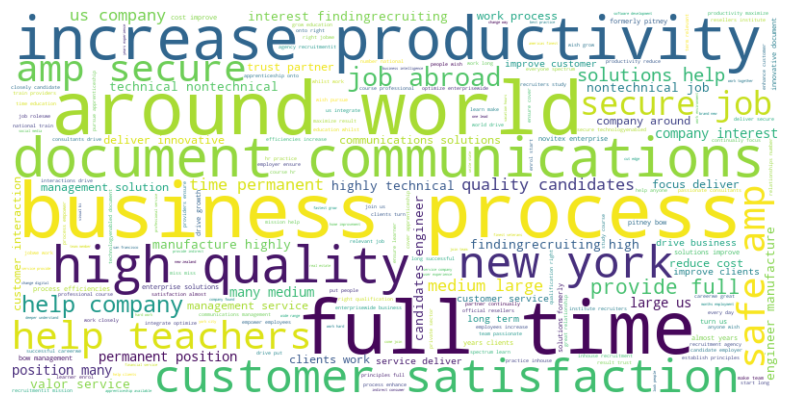

In [39]:
show_wordcloud(noFraud, "company_profile")

High quality, and full time jobs are no surprise real when it comes to job postings. These company profiles use words that indicate there is much work that takes place at said place.

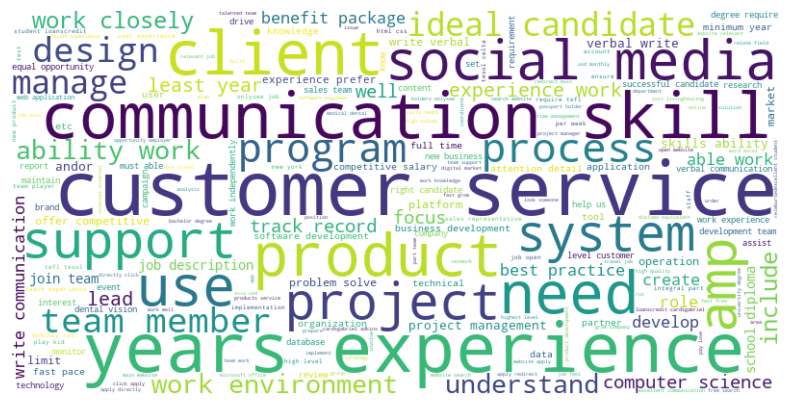

In [40]:
show_wordcloud(noFraud, "main_text")

In the main text, communication, customer service, and years of experience are frequent.

#### Fraudulent

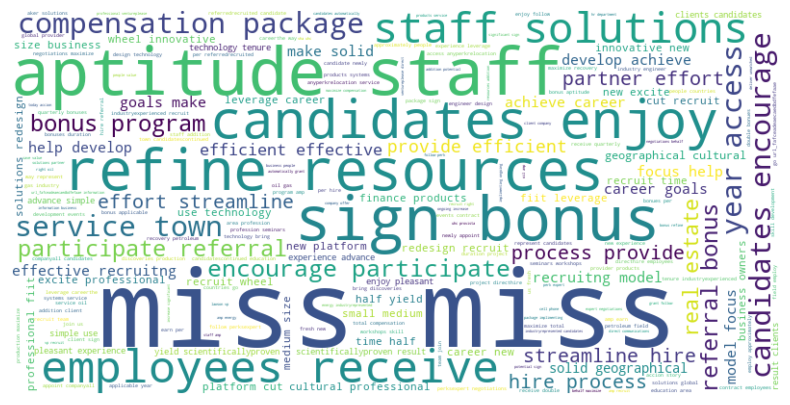

In [41]:
show_wordcloud(yesFraud, "company_profile")

Many fraudulent cases have no text ("miss") in their company_profiles. These companies advertise pleasure ("bonus," "enjoy," "receive") versus the real company profiles that post actual jobs ("high-quality," "document," "buisness process").

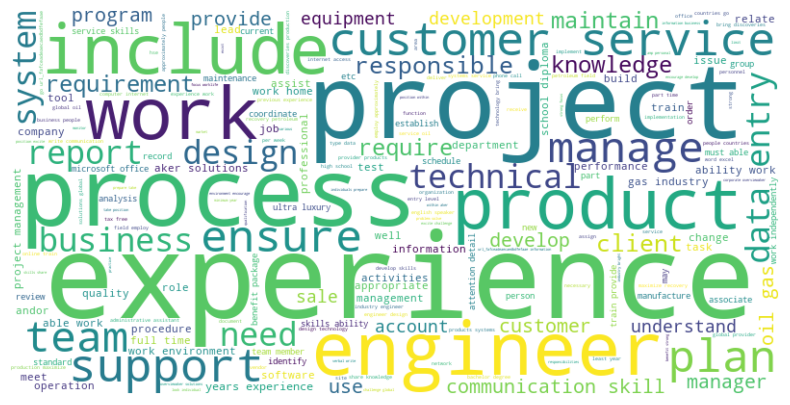

In [42]:
show_wordcloud(yesFraud, "main_text")

Comparing the main_text in from the real jobs, non of these words are obvious indicators that the job may be fake. 

#### Bag of Words Encoding all with Some Word Clouds

In [43]:
""" Bag of Words Text Encoding. """

from sklearn.feature_extraction.text import CountVectorizer

# encoders
main_text_bow = CountVectorizer(max_features=1_200)
company_profile_bow = CountVectorizer(max_features=800)

# text columns to be encoded
text_cols = ["main_text", "company_profile"]

# changing datatype of columns
for col in text_cols:
    text_df[col] = text_df[col].astype(pd.StringDtype())
    
feature_company_profile = company_profile_bow.fit_transform(text_df["company_profile"]) 
feature_main_text = main_text_bow.fit_transform(text_df["main_text"]) 

In [44]:
bow_df = pd.concat([
    pd.DataFrame(feature_company_profile.toarray(), columns=["company_profile_" + x for x in company_profile_bow.get_feature_names_out()]),
    pd.DataFrame(feature_main_text.toarray(), columns=["main_text_" + x for x in main_text_bow.get_feature_names_out()]),
], axis=1)

In [45]:
bow_df

,company_profile_ability,company_profile_able,company_profile_abroad,company_profile_access,company_profile_account,company_profile_achieve,company_profile_acquisition,company_profile_across,company_profile_action,company_profile_activities,...,main_text_worldclass,main_text_worlds,main_text_worldwide,main_text_would,main_text_write,main_text_year,main_text_years,main_text_york,main_text_young,main_text_και
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,3,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,2,1,1,0,0,0
4,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17529,0,0,0,0,0,0,0,0,0,0,...,0,2,0,1,1,0,0,0,0,0
17530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,2,0,0,0
17531,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
17532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Above is the text features. The original 

### Final Concatenation

In [46]:
orignDf = df.copy()
df = pd.concat([bow_df, categorical_df, df["fraudulent"]], axis=1)

## Modeling

* Built 12 models total. 
* The types of models built were Random Forest (RF), Naive Bayes, and XGBoost.
* The model with the highest F1 while maintaining a balanced false positive and false negative rate (looking visually at confusion matrix) will be deemed the "winner."

#### Functions & Imports

In [47]:
""" Functions for Model Metrics & Partitioning. """

from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import(accuracy_score, 
                             f1_score, 
                             recall_score, 
                             precision_score,
                             confusion_matrix)

def modelMetrics(modelName, test, prediction) -> dict:
    print(confusion_matrix(test, prediction))
    accuracy = accuracy_score(test, prediction)
    recall = recall_score(test, prediction, average="weighted")
    f1 = f1_score(test, prediction)
    precision = precision_score(test, prediction)
    return {"Model Name": modelName,
             "Test Accuracy":accuracy, 
             "Recall": recall,
             "F1": f1, 
             "Precision": precision}


def randUnderSample(X_train, y_train):
    X_train_resampled, y_train_resampled = RandomUnderSampler(random_state=77).fit_resample(X_train, y_train)
    print(f"Bef {y_train.value_counts()}\nAft {y_train_resampled.value_counts()}")
    return X_train_resampled, y_train_resampled

def testTrainPrediction(model, X_test, X_train):
    return model.predict(X_test), model.predict(X_train)

def partitionData(X, y, test_size: float):
    """ Return X_train, X_test, y_train, y_test"""
    if "train_test_split" not in dir():
        from sklearn.model_selection import train_test_split
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=test_size,
                                                        random_state=777)
    print(f" [{1 - test_size:.1%}] Train: {len(X_train)}, [{test_size:.1%}] Test: {len(X_test)}")
    return X_train, X_test, y_train, y_test

def gridSearch(param_grid:dict, model, cv:int, scoring:str, X_train, y_train):
    """ Find best parameters in grid. """
    grs = GridSearchCV(model, param_grid, cv=cv, scoring=scoring) # sklearn import
    grs.fit(X_train, y_train)  
    bestParm = grs.best_params_
    bestScore = grs.best_score_
    return (f"Parameters: {bestParm} Score[{scoring}]:{bestScore}")

def fromRFECV(RFECV, X_train):
    keepers = X_train.columns[RFECV.support_]
    return keepers

#### Data Used

In [48]:
df

,company_profile_ability,company_profile_able,company_profile_abroad,company_profile_access,company_profile_account,company_profile_achieve,company_profile_acquisition,company_profile_across,company_profile_action,company_profile_activities,...,main_text_years,main_text_york,main_text_young,main_text_και,location,employment_type,required_experience,required_education,industry,fraudulent
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,85,2,4,0,83,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,60,1,7,0,75,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,85,2,6,0,83,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,85,1,5,2,22,0
4,0,0,0,0,0,0,1,1,0,0,...,1,0,0,0,85,1,5,2,51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,12,1,5,0,22,0
17530,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,85,1,5,2,61,0
17531,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,85,1,6,0,83,0
17532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,56,0,7,1,48,0


### Model 1
#### "Random Forest Base"
* For this model and onwards, used a 70, 30 (training, testing) partition split. There is no particular reason for this move.
* For this model and onwards, used the Synthetic Minority Oversampling Technique (SMOTE) to balance __only__ the training partition of the data. 

#### Split

In [49]:
X_train, X_test, y_train, y_test = \
                                    \
                        partitionData(
                        X = df.drop(["fraudulent"], axis=1),
                        y = df["fraudulent"],
                        test_size = 0.3) 

 [70.0%] Train: 12273, [30.0%] Test: 5261


#### Balance

In [50]:
smote = SMOTE(random_state=77)
X_train_s, y_train_s = smote.fit_resample(X_train, y_train)

#### Model Build

In [51]:
rf1 = RandomForestClassifier(n_estimators=10,
                             max_depth=5,
                             random_state=77,
                            )
# Fit Model 
rf1.fit(X_train_s, y_train_s)

# Test & Train Predicitons 
y_pred, y_train_pred = testTrainPrediction(rf1, X_test, X_train_s)

In [52]:
# Storing Metrics

modelOne = modelMetrics("Random Forest Undersampled", y_test, y_pred)
print(modelOne)

[[4204  792]
 [  42  223]]
{'Model Name': 'Random Forest Undersampled', 'Test Accuracy': 0.8414750047519483, 'Recall': 0.8414750047519483, 'F1': 0.3484375, 'Precision': 0.21970443349753693}


This model thinks many observations are fake when in reality, they are not.

### Model 2
#### Feature Selection "RFECV"
RFECV: Recursive Feature Elimination with Cross-Validation.

* Used F1 and precision as the scoring metric for the RFECV. Determined that the f1 scoring metric created a model that was more in align with the goals.
* Fit the RFECV with the SMOTE training data

In [53]:
""" Recursive Feature Elimination with Cross-Validation for feature selection. """

rfecv = RFECV(estimator= rf1, # used model 1 as base estimator 
              step=8,         # The number of features to eliminate at each iteration (default is 1)
              cv=3,           # The number of folds for cross-validation (default is 5)
              scoring='f1')   # F1 Score Maxing

# Fitting the RFECV model to the training data
rfecv.fit(X_train_s, y_train_s)

RFECV(cv=3,
      estimator=RandomForestClassifier(max_depth=5, n_estimators=10,
                                       random_state=77),
      scoring='f1', step=8)

In [54]:
keepers = fromRFECV(rfecv, X_train_s)

In [55]:
pruned_df = pd.concat([df[keepers], df["fraudulent"]], axis=1)

#### Split

In [56]:
X_train, X_test, y_train, y_test = \
                                    \
                        partitionData(
                        X = (pruned_df.drop("fraudulent", axis=1)), # <- Difference from model 1
                        y = pruned_df["fraudulent"],
                        test_size = 0.3) 

 [70.0%] Train: 12273, [30.0%] Test: 5261


#### Balance

In [57]:
smote = SMOTE(random_state=77)
X_train_s, y_train_s = smote.fit_resample(X_train, y_train)

#### Model Build

In [58]:
rf2 = RandomForestClassifier(n_estimators=10,
                                  max_depth=5,
                                  random_state=77,
                                  )
rf2.fit(X_train_s, y_train_s)

# Test & Train Predicitons 
y_pred, y_train_pred = testTrainPrediction(rf2, X_test, X_train_s)

In [59]:
modelTwo = modelMetrics("RF, SMOTE, RFECV", y_test, y_pred)
print(modelTwo)

[[4253  743]
 [  39  226]]
{'Model Name': 'RF, SMOTE, RFECV', 'Test Accuracy': 0.8513590572134575, 'Recall': 0.8513590572134575, 'F1': 0.3662884927066451, 'Precision': 0.23323013415892674}


This model is slightly better with the noisy features removed. For future models we will use the RFECV columns selected.

___

In [60]:
pd.DataFrame([modelOne, modelTwo])

,Model Name,Test Accuracy,Recall,F1,Precision
0,Random Forest Undersampled,0.841475,0.841475,0.348438,0.219704
1,"RF, SMOTE, RFECV",0.851359,0.851359,0.366288,0.233230


> Note: From here on out, the models will be fit using the training partition that had SMOTE applied. The models will also use the features selected in the Random Forest RFECV

### Model 3
* Used class weights on unbalanced data

#### Class Weights

In [61]:
class_weights = compute_class_weight('balanced', 
                                     classes=[0, 1], 
                                     y=y_train) # need sklearn import

class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

print(class_weight_dict)

{0: 0.5248909417500641, 1: 10.543814432989691}


Since the train and test are balanced, this output makes sense.

#### Model Build (3)

Tampering with the class weights many times above

In [62]:
rf3 = RandomForestClassifier(random_state=77,
                             n_estimators = 10,
                             max_depth=5, 
                             class_weight=class_weight_dict, # The weights 
                            )

rf3.fit(X_train, y_train)

y_pred, y_train_pred = testTrainPrediction(rf3, X_test, X_train_s)

In [63]:
modelThree = modelMetrics("RF, RFECV, Weighted", y_test, y_pred)
print(modelThree)

[[3919 1077]
 [  12  253]]
{'Model Name': 'RF, RFECV, Weighted', 'Test Accuracy': 0.7930051321041627, 'Recall': 0.7930051321041627, 'F1': 0.3172413793103448, 'Precision': 0.19022556390977444}


In [64]:
pd.DataFrame([modelOne, modelTwo, modelThree])

,Model Name,Test Accuracy,Recall,F1,Precision
0,Random Forest Undersampled,0.841475,0.841475,0.348438,0.219704
1,"RF, SMOTE, RFECV",0.851359,0.851359,0.366288,0.233230
2,"RF, RFECV, Weighted",0.793005,0.793005,0.317241,0.190226


Using the weights from the unbalanced training was a bad idea. This model is the worst yet.

### Model 4
#### Random Forest Grid Search
* Grid Search using Model 2 as the base estimator

In [65]:
# Define the parameter grid for the negative class
param_grid = {
    'n_estimators': [5, 10],
    'max_depth': [1, 3],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini'],
}

gridSearch(param_grid,
          model=rf2,
          cv=3,
          scoring="recall_macro",
          X_train=X_train_s,
          y_train=y_train_s)

"Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10} Score[recall_macro]:0.8780685997776067"

#### Model Build

In [66]:
bestparms = {'bootstrap': True, 
             'criterion': 'gini', 
             'max_depth': 3, 
             'max_features': 'sqrt', 
             'min_samples_leaf': 1, 
             'min_samples_split': 2, 
             'n_estimators': 10,
             "random_state":777
            }

In [67]:
rf4 = RandomForestClassifier(**bestparms)

rf4.fit(X_train, y_train)

y_pred, y_train_pred = testTrainPrediction(rf4, X_test, X_train_s)

In [68]:
modelFour = modelMetrics("RF, RFECV, Weighted, Tuned", y_test, y_pred)
print(modelFour)

[[4996    0]
 [ 260    5]]
{'Model Name': 'RF, RFECV, Weighted, Tuned', 'Test Accuracy': 0.9505797376924539, 'Recall': 0.9505797376924539, 'F1': 0.037037037037037035, 'Precision': 1.0}


This model predicted modst observations as real job postings. When it did predict a fraudulent job posting, it was never wrong (still bad model though). 

In [69]:
pd.DataFrame([modelOne, modelTwo, modelThree, modelFour])

,Model Name,Test Accuracy,Recall,F1,Precision
0,Random Forest Undersampled,0.841475,0.841475,0.348438,0.219704
1,"RF, SMOTE, RFECV",0.851359,0.851359,0.366288,0.233230
2,"RF, RFECV, Weighted",0.793005,0.793005,0.317241,0.190226
3,"RF, RFECV, Weighted, Tuned",0.950580,0.950580,0.037037,1.000000


### Model 5 - RF
* grid searching the class weight

In [70]:
param_grid = {
    "class_weight": [{0: 1-i, 1: i} for i in np.arange(0.1, 1, 0.05)]
}

gridSearch(param_grid,
          model=rf4,
          cv=3,
          scoring="f1_macro",
          X_train=X_train_s,
          y_train=y_train_s)

"Parameters: {'class_weight': {0: 0.5499999999999999, 1: 0.45000000000000007}} Score[f1_macro]:0.8780987614288813"

In [71]:
cWeight = {0: .5499999999999999, 1: 0.45000000000000007}
bestparms["class_weight"] = cWeight

rf5 = RandomForestClassifier(**bestparms)

rf5.fit(X_train_s, y_train_s)

y_pred, y_train_pred = testTrainPrediction(rf5, X_test, X_train_s)

In [72]:
modelFive = modelMetrics("RF, SMOTE, RFECV, Weighted, Tuned", y_test, y_pred)
print(modelFive)

[[4450  546]
 [ 110  155]]
{'Model Name': 'RF, SMOTE, RFECV, Weighted, Tuned', 'Test Accuracy': 0.8753088766394221, 'Recall': 0.8753088766394221, 'F1': 0.32091097308488614, 'Precision': 0.2211126961483595}


The class weight grid searching was not too successful. This model is better then the class weight that wasn't based off the SMOTE data but it's still bad. 

In [73]:
pd.DataFrame([modelOne, modelTwo, modelThree, modelFour,
             modelFive])

,Model Name,Test Accuracy,Recall,F1,Precision
0,Random Forest Undersampled,0.841475,0.841475,0.348438,0.219704
1,"RF, SMOTE, RFECV",0.851359,0.851359,0.366288,0.233230
2,"RF, RFECV, Weighted",0.793005,0.793005,0.317241,0.190226
3,"RF, RFECV, Weighted, Tuned",0.950580,0.950580,0.037037,1.000000
4,"RF, SMOTE, RFECV, Weighted, Tuned",0.875309,0.875309,0.320911,0.221113


### Model 6 - Naive Bayes

In [74]:
nb = BernoulliNB()

nb.fit(X_train_s, y_train_s)
y_pred, y_train_pred = testTrainPrediction(nb, X_test, X_train_s)

modelSix = modelMetrics("Naive Bayes, SMOTE, RFECV", y_pred, y_test)
print(modelSix)

[[4477  102]
 [ 519  163]]
{'Model Name': 'Naive Bayes, SMOTE, RFECV', 'Test Accuracy': 0.8819616042577457, 'Recall': 0.8819616042577457, 'F1': 0.34424498416050686, 'Precision': 0.6150943396226415}


This is the most balanced model when looking at all metrics. The confusion matrix is not good, but still the most balanced thus far. There will be no further tuning with this model.

In [75]:
pd.DataFrame([modelOne, modelTwo, modelThree, modelFour,
             modelFive, modelSix])

,Model Name,Test Accuracy,Recall,F1,Precision
0,Random Forest Undersampled,0.841475,0.841475,0.348438,0.219704
1,"RF, SMOTE, RFECV",0.851359,0.851359,0.366288,0.233230
2,"RF, RFECV, Weighted",0.793005,0.793005,0.317241,0.190226
3,"RF, RFECV, Weighted, Tuned",0.950580,0.950580,0.037037,1.000000
4,"RF, SMOTE, RFECV, Weighted, Tuned",0.875309,0.875309,0.320911,0.221113
5,"Naive Bayes, SMOTE, RFECV",0.881962,0.881962,0.344245,0.615094


### Model 7 XGBoost with Random Forest
* XGBoost stacked with a random forest

In [76]:
# Train an XGBoost model on the predictions of the Random Forest model
xgb_model = XGBClassifier()
xgb_model.fit(X_train_s, rf2.predict(X_train_s))

# Make predictions using the XGBoost model
y_pred, y_train_pred = testTrainPrediction(xgb_model, X_test, X_train_s)

In [77]:
modelSeven = modelMetrics("XGBoost(RF), SMOTE, RFECV", y_pred, y_test)
print(modelSeven)

[[4285   40]
 [ 711  225]]
{'Model Name': 'XGBoost(RF), SMOTE, RFECV', 'Test Accuracy': 0.8572514731039726, 'Recall': 0.8572514731039726, 'F1': 0.37468776019983346, 'Precision': 0.8490566037735849}


In [78]:
pd.DataFrame([modelOne, modelTwo, modelThree, modelFour,
             modelFive, modelSix, modelSeven])

,Model Name,Test Accuracy,Recall,F1,Precision
0,Random Forest Undersampled,0.841475,0.841475,0.348438,0.219704
1,"RF, SMOTE, RFECV",0.851359,0.851359,0.366288,0.233230
2,"RF, RFECV, Weighted",0.793005,0.793005,0.317241,0.190226
3,"RF, RFECV, Weighted, Tuned",0.950580,0.950580,0.037037,1.000000
4,"RF, SMOTE, RFECV, Weighted, Tuned",0.875309,0.875309,0.320911,0.221113
5,"Naive Bayes, SMOTE, RFECV",0.881962,0.881962,0.344245,0.615094
6,"XGBoost(RF), SMOTE, RFECV",0.857251,0.857251,0.374688,0.849057


This model had the best F1 so far. The changes are not too drastic though.

### Model 8 XGBoost 
* Instead of stacking with a Random Forest, saw what would happen "as is."

In [79]:
xgb2 = XGBClassifier(random_state=77)
xgb2.fit(X_train_s, y_train_s)

# Make predictions using the XGBoost model
y_pred, y_train_pred = testTrainPrediction(xgb2, X_test, X_train_s)

In [80]:
modelEight = modelMetrics("XGBoost, SMOTE, RFECV", y_pred, y_test)
print(modelEight)

[[4924   56]
 [  72  209]]
{'Model Name': 'XGBoost, SMOTE, RFECV', 'Test Accuracy': 0.9756700247101312, 'Recall': 0.9756700247101312, 'F1': 0.7655677655677657, 'Precision': 0.7886792452830189}


In [81]:
pd.DataFrame([modelOne, modelTwo, modelThree, modelFour,
             modelFive, modelSix, modelSeven, modelEight,])

,Model Name,Test Accuracy,Recall,F1,Precision
0,Random Forest Undersampled,0.841475,0.841475,0.348438,0.219704
1,"RF, SMOTE, RFECV",0.851359,0.851359,0.366288,0.233230
2,"RF, RFECV, Weighted",0.793005,0.793005,0.317241,0.190226
3,"RF, RFECV, Weighted, Tuned",0.950580,0.950580,0.037037,1.000000
4,"RF, SMOTE, RFECV, Weighted, Tuned",0.875309,0.875309,0.320911,0.221113
5,"Naive Bayes, SMOTE, RFECV",0.881962,0.881962,0.344245,0.615094
6,"XGBoost(RF), SMOTE, RFECV",0.857251,0.857251,0.374688,0.849057
7,"XGBoost, SMOTE, RFECV",0.975670,0.975670,0.765568,0.788679


Fitting the XGBoost model with the Random Forest (RF) predictions was a bad idea. Using a default XGBoost model had huge improvements in the F1. Looking at the confusion matrix, the balance in the fals positives and negatives is astounding.

### Model 9 XGBoost Tuned
* tuned the max depth 

In [82]:
xgb3 = XGBClassifier(random_state=77)

max_depth_range = [3, 
                   5, 
                   7, 
                   9, 
                   11]

for depth in max_depth_range:
    xgb3.set_params(max_depth=depth)
    xgb3.fit(X_train_s, y_train_s)                                      # Train the model
    y_pred, y_train_pred = testTrainPrediction(xgb3, X_test, X_train_s)
    
    print(modelMetrics(f"dpth = {depth} XGBoost", y_pred, y_test))      # Predict and evaluate the F1 score


[[4839   54]
 [ 157  211]]
{'Model Name': 'dpth = 3 XGBoost', 'Test Accuracy': 0.9598935563581068, 'Recall': 0.9598935563581068, 'F1': 0.6666666666666667, 'Precision': 0.7962264150943397}
[[4907   59]
 [  89  206]]
{'Model Name': 'dpth = 5 XGBoost', 'Test Accuracy': 0.9718684660710891, 'Recall': 0.9718684660710891, 'F1': 0.7357142857142858, 'Precision': 0.7773584905660378}
[[4938   64]
 [  58  201]]
{'Model Name': 'dpth = 7 XGBoost', 'Test Accuracy': 0.9768104923018438, 'Recall': 0.9768104923018438, 'F1': 0.7671755725190841, 'Precision': 0.7584905660377359}
[[4948   58]
 [  48  207]]
{'Model Name': 'dpth = 9 XGBoost', 'Test Accuracy': 0.9798517392130773, 'Recall': 0.9798517392130773, 'F1': 0.7961538461538462, 'Precision': 0.7811320754716982}
[[4952   60]
 [  44  205]]
{'Model Name': 'dpth = 11 XGBoost', 'Test Accuracy': 0.9802318950769816, 'Recall': 0.9802318950769816, 'F1': 0.7976653696498054, 'Precision': 0.7735849056603774}


A max depth of 9 is the best. 

In [83]:
xgb3 = XGBClassifier(random_state=77,
                    max_depth=9)

xgb3.fit(X_train_s, y_train_s)

y_pred, y_train_pred = testTrainPrediction(xgb3, X_test, X_train_s)

modelNine = modelMetrics("XGBoost, SMOTE, RFECV, Tuned", y_pred, y_test)
print(modelNine)

[[4948   58]
 [  48  207]]
{'Model Name': 'XGBoost, SMOTE, RFECV, Tuned', 'Test Accuracy': 0.9798517392130773, 'Recall': 0.9798517392130773, 'F1': 0.7961538461538462, 'Precision': 0.7811320754716982}


In [84]:
pd.DataFrame([modelOne, modelTwo, modelThree, modelFour,
             modelFive, modelSix, modelSeven, modelEight,
             modelNine,])

,Model Name,Test Accuracy,Recall,F1,Precision
0,Random Forest Undersampled,0.841475,0.841475,0.348438,0.219704
1,"RF, SMOTE, RFECV",0.851359,0.851359,0.366288,0.233230
2,"RF, RFECV, Weighted",0.793005,0.793005,0.317241,0.190226
3,"RF, RFECV, Weighted, Tuned",0.950580,0.950580,0.037037,1.000000
4,"RF, SMOTE, RFECV, Weighted, Tuned",0.875309,0.875309,0.320911,0.221113
5,"Naive Bayes, SMOTE, RFECV",0.881962,0.881962,0.344245,0.615094
6,"XGBoost(RF), SMOTE, RFECV",0.857251,0.857251,0.374688,0.849057
7,"XGBoost, SMOTE, RFECV",0.975670,0.975670,0.765568,0.788679
8,"XGBoost, SMOTE, RFECV, Tuned",0.979852,0.979852,0.796154,0.781132


Tunning the max_depth improved the models F1 score by almost 3%.

### Model 10 
* attempted to tune learning rate

In [85]:
xgb4 = XGBClassifier(random_state=77,
                    max_depth=9)

learning_rate_range = [0.001, 
                       0.01, 
                       0.1, 
                       0.2, 
                       0.3]

for learning_rate in learning_rate_range:
    xgb4.set_params(learning_rate=learning_rate)
    
    # Train the model
    xgb4.fit(X_train_s, y_train_s)
    
    y_pred, y_train_pred = testTrainPrediction(xgb4, X_test, X_train_s)
    
    # Predict and evaluate the F1 score
    print(modelMetrics(f"lrnRt = {learning_rate} XGBoost", y_pred, y_test))

[[4509   55]
 [ 487  210]]
{'Model Name': 'lrnRt = 0.001 XGBoost', 'Test Accuracy': 0.8969777608819616, 'Recall': 0.8969777608819616, 'F1': 0.4365904365904366, 'Precision': 0.7924528301886793}
[[4709   50]
 [ 287  215]]
{'Model Name': 'lrnRt = 0.01 XGBoost', 'Test Accuracy': 0.9359437369321422, 'Recall': 0.9359437369321422, 'F1': 0.5606258148631029, 'Precision': 0.8113207547169812}
[[4906   51]
 [  90  214]]
{'Model Name': 'lrnRt = 0.1 XGBoost', 'Test Accuracy': 0.9731990115947539, 'Recall': 0.9731990115947539, 'F1': 0.7521968365553603, 'Precision': 0.8075471698113208}
[[4941   51]
 [  55  214]]
{'Model Name': 'lrnRt = 0.2 XGBoost', 'Test Accuracy': 0.9798517392130773, 'Recall': 0.9798517392130773, 'F1': 0.801498127340824, 'Precision': 0.8075471698113208}
[[4948   58]
 [  48  207]]
{'Model Name': 'lrnRt = 0.3 XGBoost', 'Test Accuracy': 0.9798517392130773, 'Recall': 0.9798517392130773, 'F1': 0.7961538461538462, 'Precision': 0.7811320754716982}


A learning_rate of .2 is best. 

In [86]:
xgb4 = XGBClassifier(random_state=77,
                    max_depth=9,
                    learning_rate=.2,
                    )

xgb4.fit(X_train_s, y_train_s)

y_pred, y_train_pred = testTrainPrediction(xgb4, X_test, X_train_s)

modelTen = modelMetrics("XGBoost, SMOTE, RFECV, Tuned (x2)", y_pred, y_test)
print(modelTen)

[[4941   51]
 [  55  214]]
{'Model Name': 'XGBoost, SMOTE, RFECV, Tuned (x2)', 'Test Accuracy': 0.9798517392130773, 'Recall': 0.9798517392130773, 'F1': 0.801498127340824, 'Precision': 0.8075471698113208}


The number of false negatives increase by eight and the number of false positives decreased by seven.

In [87]:
pd.DataFrame([modelOne, modelTwo, modelThree, modelFour,
             modelFive, modelSix, modelSeven, modelEight,
             modelNine, modelTen])

,Model Name,Test Accuracy,Recall,F1,Precision
0,Random Forest Undersampled,0.841475,0.841475,0.348438,0.219704
1,"RF, SMOTE, RFECV",0.851359,0.851359,0.366288,0.233230
2,"RF, RFECV, Weighted",0.793005,0.793005,0.317241,0.190226
3,"RF, RFECV, Weighted, Tuned",0.950580,0.950580,0.037037,1.000000
4,"RF, SMOTE, RFECV, Weighted, Tuned",0.875309,0.875309,0.320911,0.221113
5,"Naive Bayes, SMOTE, RFECV",0.881962,0.881962,0.344245,0.615094
6,"XGBoost(RF), SMOTE, RFECV",0.857251,0.857251,0.374688,0.849057
7,"XGBoost, SMOTE, RFECV",0.975670,0.975670,0.765568,0.788679
8,"XGBoost, SMOTE, RFECV, Tuned",0.979852,0.979852,0.796154,0.781132
9,"XGBoost, SMOTE, RFECV, Tuned (x2)",0.979852,0.979852,0.801498,0.807547


Model 10 is the most balanced model yet.

### Model 11
* n_estimators maxing

In [88]:
xgb5 = XGBClassifier(random_state=77,
                    max_depth=9,
                    learning_rate=.2)

n_estimators_range = [50, 
                      100, # default
                      200, 
                      250, 
                      300]

for est in n_estimators_range:
    xgb5.set_params(n_estimators=est)
    
    # Train the model
    xgb5.fit(X_train_s, y_train_s)
    
    y_pred, y_train_pred = testTrainPrediction(xgb5, X_test, X_train_s)
    
    # Predict and evaluate the F1 score
    print(modelMetrics(f"n_est = {est} XGBoost", y_pred, y_test))

[[4913   57]
 [  83  208]]
{'Model Name': 'n_est = 50 XGBoost', 'Test Accuracy': 0.973389089526706, 'Recall': 0.973389089526706, 'F1': 0.748201438848921, 'Precision': 0.7849056603773585}
[[4941   51]
 [  55  214]]
{'Model Name': 'n_est = 100 XGBoost', 'Test Accuracy': 0.9798517392130773, 'Recall': 0.9798517392130773, 'F1': 0.801498127340824, 'Precision': 0.8075471698113208}
[[4955   58]
 [  41  207]]
{'Model Name': 'n_est = 200 XGBoost', 'Test Accuracy': 0.9811822847367421, 'Recall': 0.9811822847367421, 'F1': 0.8070175438596492, 'Precision': 0.7811320754716982}
[[4951   56]
 [  45  209]]
{'Model Name': 'n_est = 250 XGBoost', 'Test Accuracy': 0.9808021288728379, 'Recall': 0.9808021288728379, 'F1': 0.8053949903660886, 'Precision': 0.7886792452830189}
[[4954   56]
 [  42  209]]
{'Model Name': 'n_est = 300 XGBoost', 'Test Accuracy': 0.9813723626686942, 'Recall': 0.9813723626686942, 'F1': 0.810077519379845, 'Precision': 0.7886792452830189}


The defult 100 was the best but 300 has the highest f1.

In [89]:
xgb5 = XGBClassifier(random_state=77,
                    max_depth=9,
                    learning_rate=.2,
                    n_estimators=300)

xgb5.fit(X_train_s, y_train_s)

y_pred, y_train_pred = testTrainPrediction(xgb5, X_test, X_train_s)

modelEleven = modelMetrics("XGBoost, SMOTE, RFECV, Tuned (F1)", y_pred, y_test)
print(modelEleven)

[[4954   56]
 [  42  209]]
{'Model Name': 'XGBoost, SMOTE, RFECV, Tuned (F1)', 'Test Accuracy': 0.9813723626686942, 'Recall': 0.9813723626686942, 'F1': 0.810077519379845, 'Precision': 0.7886792452830189}


In [90]:
pd.DataFrame([modelOne, modelTwo, modelThree, modelFour,
             modelFive, modelSix, modelSeven, modelEight,
             modelNine, modelTen, modelEleven])

,Model Name,Test Accuracy,Recall,F1,Precision
0,Random Forest Undersampled,0.841475,0.841475,0.348438,0.219704
1,"RF, SMOTE, RFECV",0.851359,0.851359,0.366288,0.233230
2,"RF, RFECV, Weighted",0.793005,0.793005,0.317241,0.190226
3,"RF, RFECV, Weighted, Tuned",0.950580,0.950580,0.037037,1.000000
4,"RF, SMOTE, RFECV, Weighted, Tuned",0.875309,0.875309,0.320911,0.221113
5,"Naive Bayes, SMOTE, RFECV",0.881962,0.881962,0.344245,0.615094
6,"XGBoost(RF), SMOTE, RFECV",0.857251,0.857251,0.374688,0.849057
7,"XGBoost, SMOTE, RFECV",0.975670,0.975670,0.765568,0.788679
8,"XGBoost, SMOTE, RFECV, Tuned",0.979852,0.979852,0.796154,0.781132
9,"XGBoost, SMOTE, RFECV, Tuned (x2)",0.979852,0.979852,0.801498,0.807547


Model 11 had the highest F1 score but the precision was worse. This model is less balanced than the one prior but in terms of F1, better.

### Expirement 
* Bagged an XGBoost model

In [91]:
bag_xgb = BaggingClassifier(estimator=xgb4, random_state=77)

bag_xgb.fit(X_train_s, y_train_s)

y_pred, y_train_pred = testTrainPrediction(bag_xgb, X_test, X_train_s)

modelTwelve = modelMetrics("Bagged XGBoost, ...)", y_pred, y_test)
print(modelTwelve)

[[4933   63]
 [  63  202]]
{'Model Name': 'Bagged XGBoost, ...)', 'Test Accuracy': 0.9760501805740354, 'Recall': 0.9760501805740354, 'F1': 0.7622641509433963, 'Precision': 0.7622641509433963}


In [92]:
pd.DataFrame([modelOne, modelTwo, modelThree, modelFour,
             modelFive, modelSix, modelSeven, modelEight,
             modelNine, modelTen, modelEleven, modelTwelve])

,Model Name,Test Accuracy,Recall,F1,Precision
0,Random Forest Undersampled,0.841475,0.841475,0.348438,0.219704
1,"RF, SMOTE, RFECV",0.851359,0.851359,0.366288,0.233230
2,"RF, RFECV, Weighted",0.793005,0.793005,0.317241,0.190226
3,"RF, RFECV, Weighted, Tuned",0.950580,0.950580,0.037037,1.000000
4,"RF, SMOTE, RFECV, Weighted, Tuned",0.875309,0.875309,0.320911,0.221113
5,"Naive Bayes, SMOTE, RFECV",0.881962,0.881962,0.344245,0.615094
6,"XGBoost(RF), SMOTE, RFECV",0.857251,0.857251,0.374688,0.849057
7,"XGBoost, SMOTE, RFECV",0.975670,0.975670,0.765568,0.788679
8,"XGBoost, SMOTE, RFECV, Tuned",0.979852,0.979852,0.796154,0.781132
9,"XGBoost, SMOTE, RFECV, Tuned (x2)",0.979852,0.979852,0.801498,0.807547


#### Summary 
In total, there were 12 models that ran on the job postings dataset. The missing values in the dataset were set to empty strings if they were a text column and the missing values in the categorical column were either placed in an assumed missing value category that already existed, or one was made. 

The first five models were Random Forest (RF) models. These RF models did not do well in any of the metrics. The accuracy can be deceiving if giving just a simple glance but upon further investigation, the dataset was extremely imbalanced. With this in mind, Synthetic Minority Oversampling Technique (SMOTE) was applied to the training partitions of the dataset before fitting the models. 

Recursive Features Elimination with Cross Validation (RFECV) was used in the second RF model in hopes of removing noisy features. Looking at the F1, the RFECV technique for feature selection delivered upon its claim. 

Two RF models were built using class weights, for a further explanation of this, one can investigate the methods used building models 3 & 4 in this notebook. Long story short, the class weights were ineffective. 

Since the results of all RF models were not impressive, a default Naïve Bayes model was ran (using the SMOTE training and RFECV features selected). The results of this model were in the middle of the pack. No further investigations with this model were necessary. 

Getting to the best models, the XGBoost algorithm was run. The F1 score for this model was leagues better than all previous models. This algorithm was also run using the RF model in its fitting stages. This turned out to be a bad move so no hyperparameter tuning was done. 

The hyperparameter tunning was done with the default XGBoost model. The first parameter tuned was “in_depth.” The second parameter tuned was “learning_rate.” Doing these two yielded the best model in the whole notebook (this was model 10). The third parameter tuned was “n_estimators,” and the output when tunning this model was the best F1.

#### Discussion 
In the future, using RFECV with an XGBoost model as the base estimator may improve the results. Also, in the feature engineering portion, more text features in both text columns could be applied. Perhaps more meta features on the text features could be made such as, “unique words,” and “number of ‘pleasure’ words.” 

#### Conclusion 
The 10th model built using the XGBoost algorithm had the most balanced confusion matrix. This model also had the highest Precision (80.8%) and second highest F1 (80.1%). The XGBoost algorithm for this model was built using 70% of the dataset. The SMOTE technique was applied to this 70%. Of course, then, 30% of the dataset was used to test the model. 
